## Concise: 1: Start and mesh
Author: yanjun zhang, Source from book "Abali - 2017 - Computational Reality" P119

DOLFINx version: 0.8.0
Simulation environment setup complete.
1: Total braking tims is  48.05 s
2: Total numb steps is  62
The file 'm-3-5.msh' exists, start creat now:

1: Progress: 0.8%. Use time:             13 s. Start: 2024-11-26 11:03:00.      Rub radius square is  [19.00251178 19.06461625 19.08734781 18.88242471 18.69324096 18.80381311
 18.46495765 18.34397225 18.6470878  19.00208499 18.98153973 18.57514332
 19.17429406 18.99329193 19.08482277 18.34222129 18.56697191 18.68965767]
1: Progress: 1.7%. Use time:             20 s. Start: 2024-11-26 11:03:00.      Rub radius square is  [19.86314178 19.86313518 19.86313518 19.86314178 17.34998647 19.86314178
 17.34998648 17.34999819 17.34999819 19.86314178 19.86313518 17.34999819
 19.86313518 19.86314178 19.86313518 17.34998647 17.34999819 17.34998648]
1: Progress: 2.5%. Use time:             30 s. Start: 2024-11-26 11:03:00.      Rub radius square is  [19.86314178 19.86313518 19.86313518 19.86314178 17.34998648 19.86314178
 17.3499864

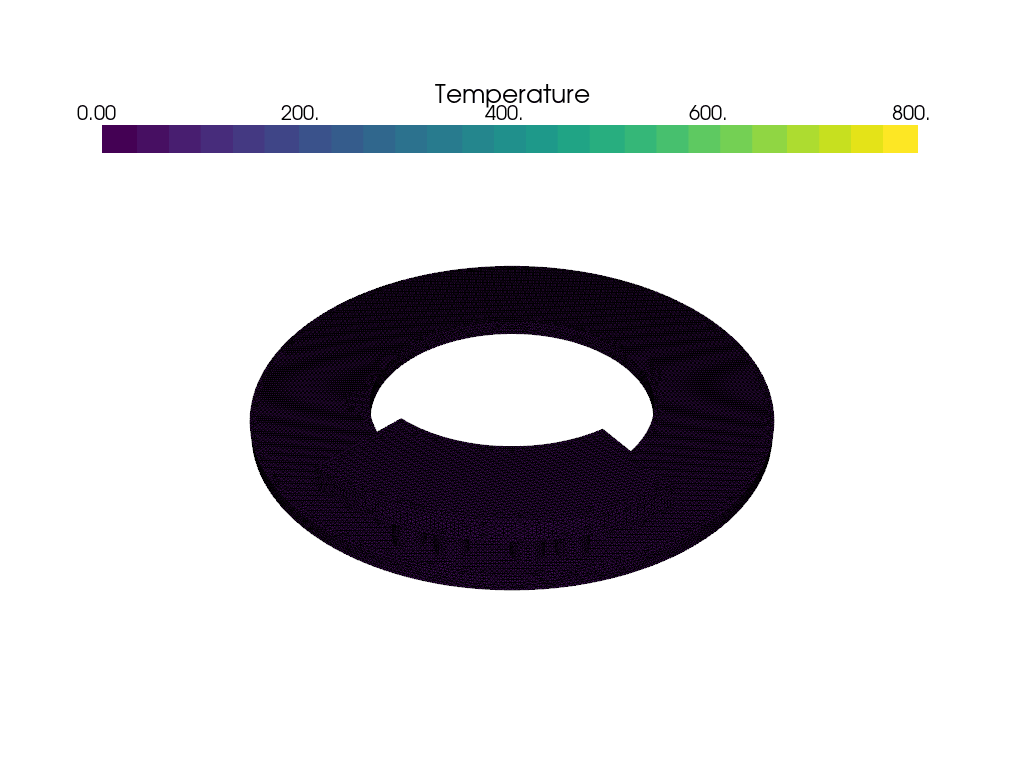

In [1]:
from disc_f import *

# mesh-size, contact area coefficient
mesh_min, mesh_max = 3, 5
c_contact          = 1

# Each time step rotation angular, and acc during lag, 1 is full acc, 0 is no acc.
angular_r          = 2240
v_vehicle, c_acc   = 160, 1
z1,z2,z3,z4,z_all  = 20,33,30,83,8
pad_v_tag          = 32
alpha_thermal      = 1e-5 #thermal expansion coefficient
penalty_param      = 400
# calling local functions to get all parameters
(dt, P, g, num_steps, h, radiation, v_angular, \
 Ti, Tm, S_rub_circle_ini, t, rho, c, k, t_brake, 
S_total,)                                       = vehicle_initial (angular_r, v_vehicle, c_contact, c_acc)
print("1: Total braking tims is ", round(sum(dt), 2), "s")
print("2: Total numb steps is ", num_steps)

## here use lots of abbreviation, details are in disc_f
domain, cell_markers, facet_markers, mesh_name, mesh_name1, mesh_name2 \
                       = mesh_brake_all(mesh_min,mesh_max,pad_v_tag)

V, T_init, u_n         = initial_u_n(domain, Ti)

fdim, bc, mesh_brake, all_e,xdmf, x_co, y_co, ds, b_con \
                       = mesh_setup( domain, V, mesh_name1, num_steps, \
                         angular_r, mesh_name2, c_contact, z_all, Tm, S_rub_circle_ini)
# Initialize
problem, u, v, f, n_vector = variation_initial(V, T_init, domain, rho, c, b_con,\
                          radiation, h, k, xdmf, dt, ds, u_n, Tm,g,bc);
solver_setup_solve(problem,u)

## Visualization of time dependent problem using pyvista
gif_name    = "T-s-{}-d-{}-{}-c-{}-e-{}.gif".format(num_steps, angular_r, mesh_name2, c_contact, all_e)
plotter, sargs, renderer, warped, viridis, grid = plot_gif(V,u,gif_name)
##solve
#num_steps= int(num_steps/2)
num_steps= int(10)
 
###################################################################
x_co_zone   = 0.001

T_array,fraction_c,deformed_co,u_d1   = solve_heat(Ti, u, num_steps, dt, x_co, y_co, angular_r, \
               t_brake, domain, S_rub_circle_ini, fdim,\
               rho, c, v, radiation, k, h, f, Tm, g,\
               ds, xdmf, b_con, bc, plotter, warped,\
               mesh_name1, mesh_brake, pad_v_tag, z4,\
               z1, x_co_zone, u_n, alpha_thermal, penalty_param)  #last u should be u_n, here we set u, \
#the same with previous:solver_setup_solve(problem,u)
####################################################################

csv_name    = "Result_T-s-{}-d-{}-{}-c-{}-e-{}.csv".format(num_steps, angular_r, mesh_name2, c_contact, all_e  )
save_t_T(csv_name, T_array) # got the Temperature data

from IPython.display import display, Image
display(Image(gif_name))

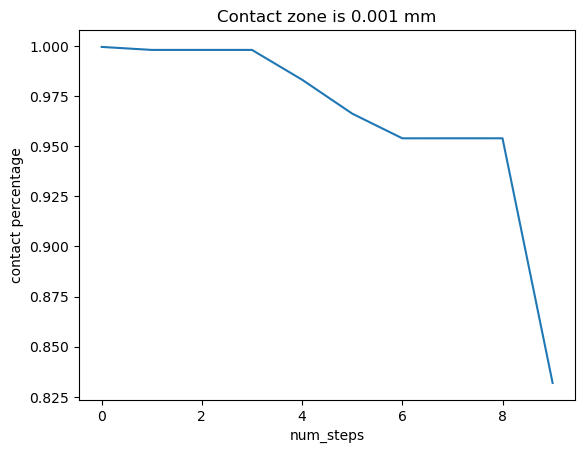

In [2]:
plt.plot(fraction_c)
plt.title (f"Contact zone is {x_co_zone} mm")
#plt.ylim(0,1.5)
plt.xlabel("num_steps")
plt.ylabel("contact percentage")
plt.savefig("new_figure.png")

In [3]:
print(len(g))


62


In [4]:
print(fraction_c)

[0.9995188110730079, 0.9980243861207728, 0.9980243860723852, 0.9980243860757253, 0.9831525385304039, 0.966252962816272, 0.9539304032363076, 0.9539386233473401, 0.9539428303731654, 0.8319191088636566]


In [5]:
c = "13.75471621 13.81682068 13.83955223 13.63462914 13.44544539 13.55601753 \
 13.21716208 13.09617667 13.39929223 13.75428942 13.73374416 13.32734775 \
 13.92649849 13.74549636 13.8370272  13.09442572 13.31917634 13.44186209"
d = c.split()
print(d)
e = []
for i in range(len(d)):
   e.append( float( d[i]) )
print(e)
f = list( map(float, d) )
print(18.8 - np.mean(f) )


['13.75471621', '13.81682068', '13.83955223', '13.63462914', '13.44544539', '13.55601753', '13.21716208', '13.09617667', '13.39929223', '13.75428942', '13.73374416', '13.32734775', '13.92649849', '13.74549636', '13.8370272', '13.09442572', '13.31917634', '13.44186209']
[13.75471621, 13.81682068, 13.83955223, 13.63462914, 13.44544539, 13.55601753, 13.21716208, 13.09617667, 13.39929223, 13.75428942, 13.73374416, 13.32734775, 13.92649849, 13.74549636, 13.8370272, 13.09442572, 13.31917634, 13.44186209]
5.247795572777777
